<a href="https://colab.research.google.com/github/jtao/VIST271/blob/main/Image_Filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Filtering with PIL

Jian Tao, Texas A&M University

Feb 28, 2022

We will explore image filtering with Python PIL library.

First a few librabries will be imported.

In [1]:
oak_path = "https://github.com/jtao/VIST271/raw/main/images/post_oak.jpg"
oak_file = "post_oak.jpg"

## Read Image

We first download an image from a URL and then open it with the Image.open function in PIL. Let's convert it to the grayscale and work on one channel only.

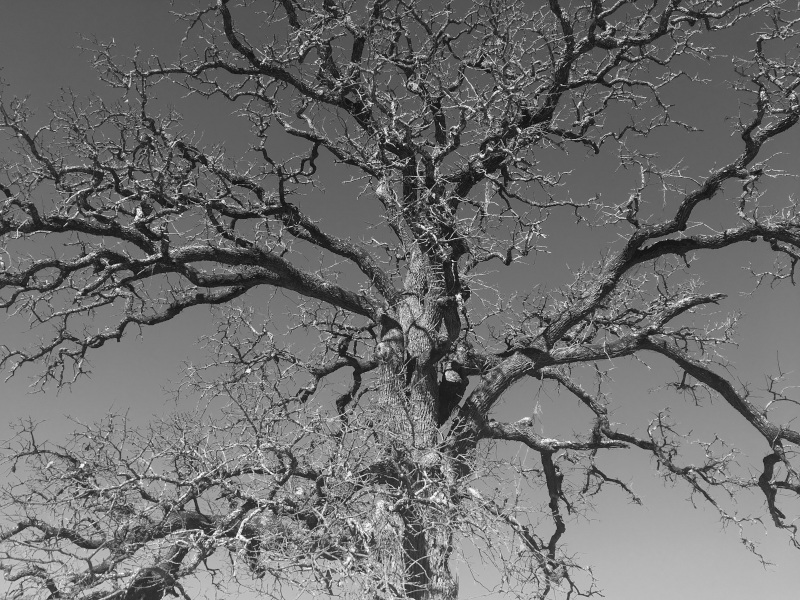

In [2]:
import numpy as np
import os
import random
from matplotlib import pyplot as plt
from PIL import Image, ImageFilter
import urllib.request
urllib.request.urlretrieve(oak_path, oak_file)
oak = Image.open(oak_file).convert('L')
oak

In [3]:
oak_mat = np.array(oak)

In [4]:
oak_mat.shape

(600, 800)

Let's pull out row 200-209 and column 200-209 of the matrix and print the numbers out.

In [5]:
print (oak_mat[200:210, 200:210])

[[ 91  61  82  90 114  94  81  87 133 113]
 [ 42  44  65 115 118 106 113  64  47 164]
 [109 112  80  59  61  41  62  71 169 167]
 [ 62 104 110  41  33 163 190  61 143 157]
 [ 31  66  49  81  54 135  55  29  43  69]
 [175  48  41  32  73  74  50  49  31  44]
 [132 186 102  90  76  84  39  41  47  38]
 [ 90 114 117  75  57  91  38  37  40  42]
 [ 98  81 113 109  84  71  59  56  49  43]
 [ 99  76 114 106 104 122  81  36  35  36]]


Let's try to plot directly from the array oak_mat

In [6]:
Image.fromarray(oak_mat[200:210, 200:210])

We can find out where it is by coloring it white in the original matrix.

In [7]:
#oak_mat[200:210, 200:210] = 255
#Image.fromarray(oak_mat)

## Segmentation filter
### Let's try to set the value of a pixel to 255 when it is greater than 100 and 0 otherwise.

In [8]:
def segmentation(im, cutoff=100):
  im_mat = np.array(im)
  for i in range(im_mat.shape[0]):
    for j in range(im_mat.shape[1]):
      if im_mat[i, j] > cutoff:
        im_mat[i, j] = 255
      else:
        im_mat[i, j] = 0
  return im_mat

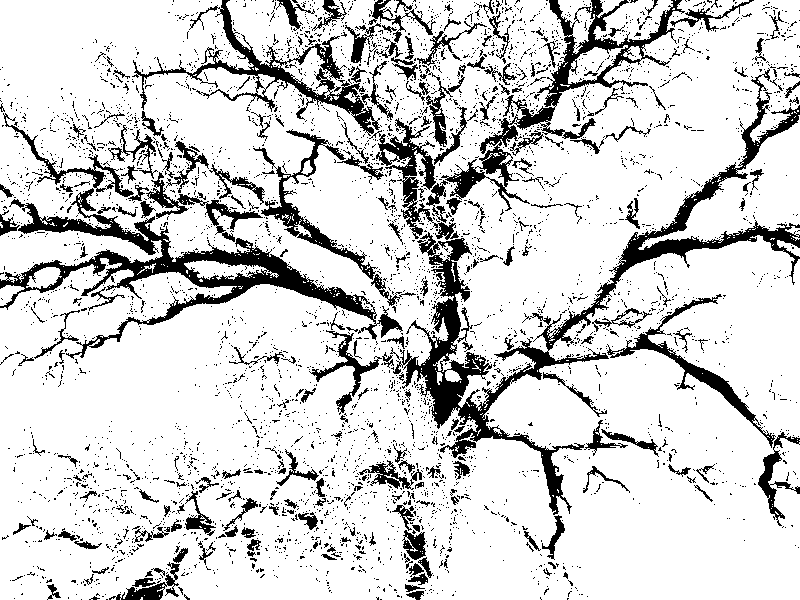

In [9]:
Image.fromarray(segmentation(oak, cutoff=70))

## Let's add some noise to the original image
The code below to add noise could be considered as a segmentation filter as well.

In [10]:
def add_noise(im, ratio=0.4):
  im_mat = np.array(im)
  mask = np.random.random(im_mat.shape)
  for i in range(mask.shape[0]):
    for j in range(mask.shape[1]):
      if mask[i, j] > 1-ratio:
        im_mat[i, j] = 255
  return im_mat

In [11]:
oak_noisy = Image.fromarray(add_noise(oak, ratio=0.1))

## Identity Filter/Kernel

In [12]:
def identity_filter(size=3):
  if size % 2 == 0:
    print ("the size must be an odd number!")
    return 
  filter_mat = np.zeros((size, size))
  filter_mat[size//2, size//2] = 1
  return filter_mat

In [15]:
identity_filter(5)

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

## Mean Filter/Kernel

In [16]:
def mean_filter(size=3):
  filter_mat = np.full((size, size), 1/(size*size))
  return filter_mat

In [17]:
mean_filter(5)

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]])

## Some other commonly used filters

In [18]:
sharpen_filter = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])

blur_filter = np.array([
    [0.0625, 0.125, 0.0625],
    [0.125,  0.25,  0.125],
    [0.0625, 0.125, 0.0625]
])

outline_filter = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
])

In [60]:
def apply_filter(im, kernel):
  im = np.asarray(im)
  m, n = im.shape
  im_new = np.zeros([m, n])
  
  for i in range(1, m-1):
    for j in range(1, n-1):
      temp = im[i-1, j-1]*kernel[0, 0] \
            +im[i-1, j  ]*kernel[0, 1] \
            +im[i-1, j+1]*kernel[0, 2] \
            +im[i,   j-1]*kernel[1, 0] \
            +im[i,   j  ]*kernel[1, 1] \
            +im[i,   j+1]*kernel[1, 2] \
            +im[i+1, j-1]*kernel[2, 0] \
            +im[i+1, j  ]*kernel[2, 1] \
            +im[i+1, j+1]*kernel[2, 2]
      
      im_new[i, j]= temp
          
  return im_new.astype(np.uint8)
  

In [61]:
ret = apply_filter(oak_noisy, mean_filter(3))

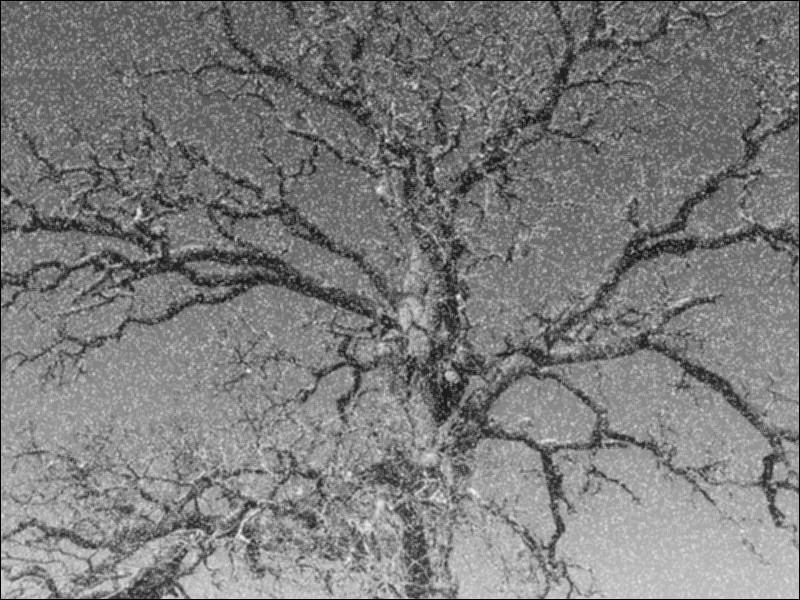

In [62]:
Image.fromarray(ret)
